In [3]:
#data manipulation
import pandas as pd
import io
import numpy as npimport warnings
warnings.filterwarnings('ignore')

# data visualisation

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cbook import boxplot_stats


#data modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PowerTransformer
import statsmodels.api as sm

ModuleNotFoundError: No module named 'pandas'

In [ ]:
#Importing Dataset

url = 'https://raw.githubusercontent.com/mitalipatle/Credit-card-limit-prediction/main/Credit_Card_Dataset.csv'
Credit_Data= pd.read_csv(url)


In [ ]:
# Cleaning Dataset

#converting string null values to numpy NaN values
Credit_Data=Credit_Data.replace(r'^#NULL!$', np.NaN, regex=True)


#217 rows found to have missing values for Marital Status
Credit_Data[Credit_Data.isna().any(axis=1)]

# Dropping missing values
Credit_Data2=Credit_Data.dropna()

#0 rows with missing values 
Credit_Data2[Credit_Data2.isna().any(axis=1)]

#dropping irrelevant columns(Since the target variable is Credit Limit so no use of attrition flag)
Credit_Data2=Credit_Data2.drop(columns=["Random_numbers","Attrition_Flag"])

#checking for duplicate values
Credit_Data2.duplicated().sum()

display(Credit_Data2)
Credit_Data2.shape




,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Credit_Limit,Avg_Utilization_Ratio,Pay_on_time
0,708082083,45,female,3,secondary,married/living with partner,<30k,blue,36,3544.0,0.469,no
1,708084558,46,male,3,third level,divorced,71 – 110k,blue,38,8258.0,0.214,no
2,708085458,34,female,2,primary,single,<30k,blue,24,1438.3,0.000,yes
3,708098133,32,female,0,third level,married/living with partner,<30k,blue,19,2834.0,0.500,no
4,708099183,37,female,2,secondary,single,<30k,blue,36,5723.0,0.327,no
...,...,...,...,...,...,...,...,...,...,...,...,...
7293,828285858,41,female,3,third level,married/living with partner,<30k,blue,37,1438.3,0.532,no
7294,828288333,50,male,0,primary,married/living with partner,51 – 70k,blue,46,3640.0,0.181,no
7295,828291858,38,male,3,third level,single,51 – 70k,blue,34,12050.0,0.151,no
7296,828294933,49,female,3,secondary,married/living with partner,<30k,blue,45,2951.0,0.826,no


(7081, 12)

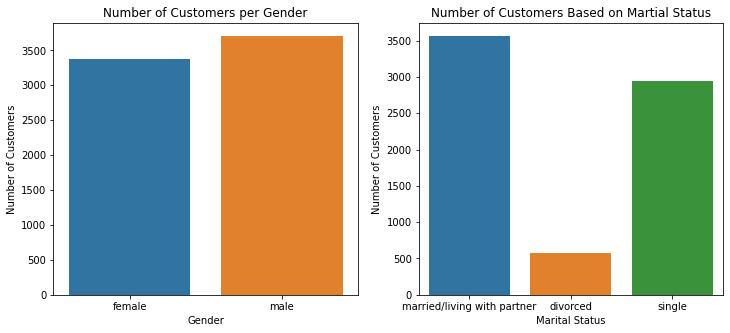

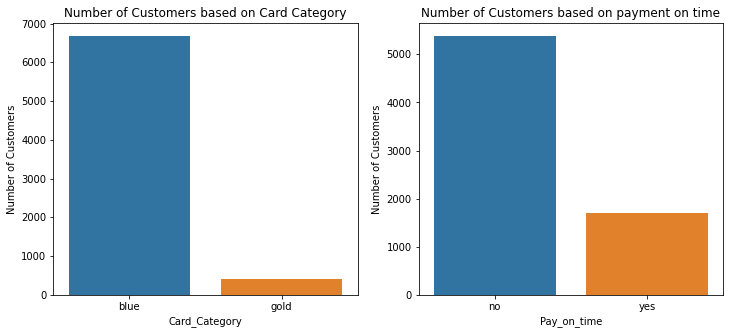

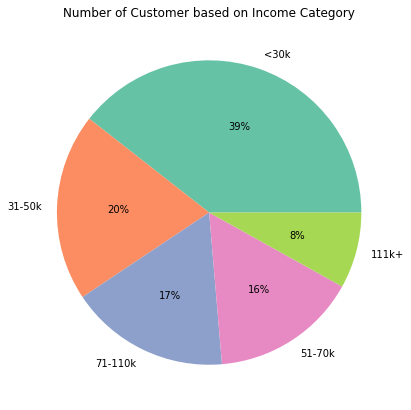

count    7081.000000
mean       46.347691
std         8.041225
min        26.000000
25%        41.000000
50%        46.000000
75%        52.000000
max        73.000000
Name: Customer_Age, dtype: float64


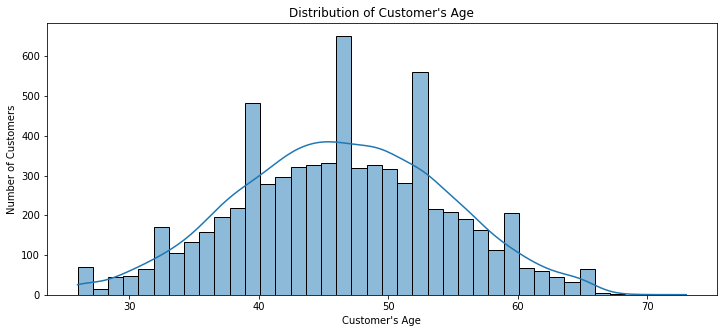

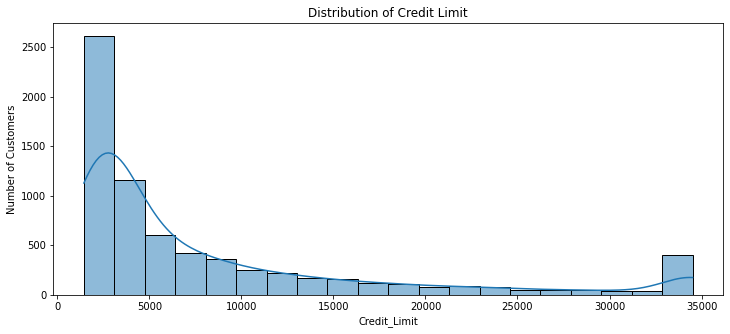

71 – 110k    228
111k+        188
51 – 70k      61
Name: Income_Category, dtype: int64
male    477
Name: Gender, dtype: int64
blue    290
gold    187
Name: Card_Category, dtype: int64
single                         239
married/living with partner    195
divorced                        43
Name: Marital_Status, dtype: int64
no     375
yes    102
Name: Pay_on_time, dtype: int64


In [ ]:
#Exploratory Data Analysis(EDA)(Part 1)

#Datatyes of the all the variables are checked and are correct

type(Credit_Data2['Customer_Age'][0]),
type(Credit_Data2['Gender'][0]),
type(Credit_Data2['Dependent_count'][0]),
type(Credit_Data2['Education_Level'][0]),
type(Credit_Data2['Marital_Status'][0]),
type(Credit_Data2['Income_Category'][0]),
type(Credit_Data2['Card_Category'][0]),
type(Credit_Data2['Months_on_book'][0]),
type(Credit_Data2['Credit_Limit'][0]),
type(Credit_Data2['Avg_Utilization_Ratio'][0]),
type(Credit_Data2['Pay_on_time'][0])



Customer_Age=Credit_Data2['Customer_Age']
Gender=Credit_Data2['Gender']
Dependent_count=Credit_Data2['Dependent_count']
Education_Level=Credit_Data2['Education_Level']
Marital_Status=Credit_Data2['Marital_Status']
Income_Category=Credit_Data2['Income_Category']
Card_Category=Credit_Data2['Card_Category']
Months_on_book=Credit_Data2['Months_on_book']
Credit_Limit=Credit_Data2['Credit_Limit']
Avg_Utilization_Ratio=Credit_Data2['Avg_Utilization_Ratio']
Pay_on_time=Credit_Data2['Pay_on_time']


#Here Credit Limit is Dependent variable and others are independent variables

#----------------------- Univariate Analysis -------------------------------


plt.figure(figsize=(12,5))
ax1 = plt.subplot(1,2,1)
#1)Number of Customers per Gender
sns.countplot(data=Credit_Data2,x=Gender, ax=ax1)
plt.title("Number of Customers per Gender")
plt.ylabel("Number of Customers")
#number of males found to be sightly more than number of females

ax2 = plt.subplot(1,2,2)
#2)Number of Customers based on their martial status
sns.countplot(data=Credit_Data2,x=Marital_Status, ax=ax2)
plt.title("Number of Customers Based on Martial Status")
plt.xlabel("Marital Status")
plt.ylabel("Number of Customers")
plt.show()
# A very few customers found to be divorced as compared to single and married


plt.figure(figsize=(12,5))
ax1 = plt.subplot(1,2,1)
#3)Number of Customers based on Card Category
sns.countplot(data=Credit_Data2,x=Card_Category, ax=ax1)
plt.title("Number of Customers based on Card Category")
plt.ylabel("Number of Customers")
#Most of the customers hold blue card than the gold card

ax2 = plt.subplot(1,2,2)
#4)Number of Customers who pay on time and who do not
sns.countplot(data=Credit_Data2,x=Pay_on_time, ax=ax2)
plt.title("Number of Customers based on payment on time")
plt.xlabel("Pay_on_time")
plt.ylabel("Number of Customers")
plt.show()
# most of the customers do not pay on time


#plotting income category using pie chart
Credit_Data2["Income_Category"].value_counts()
plt.figure(figsize=(15,7))
#5)Number of Customers based on Income Category
Income_data = Credit_Data2["Income_Category"].value_counts(normalize=True)
Income_lables=["<30k","31-50k","71-110k","51-70k","111k+"]
plt.pie(Income_data,labels=Income_lables,autopct='%.0f%%',colors=sns.color_palette("Set2"))
plt.title("Number of Customer based on Income Category")
plt.show()
#A large group of people lies in the Income category who earn  less than 30k


#6)Number of Customers as per their age
print(Credit_Data2["Customer_Age"].describe())
plt.figure(figsize=(12,5))
sns.histplot(data=Credit_Data2,x="Customer_Age",bins=40,kde=True).set(title="Distribution of Customer's Age",ylabel="Number of Customers",xlabel="Customer's Age")
plt.show()
#Mean age of customers are found to be 46.34 years and the histogram looks normally distributed 




# plotting credit Limit using scatterplot to visualise frequency distribution of numerical data
Credit_Data2["Credit_Limit"].describe()
plt.figure(figsize=(12,5))
sns.histplot(data=Credit_Data2,x="Credit_Limit",bins=20,kde=True).set(title="Distribution of Credit Limit",ylabel="Number of Customers")
plt.show()
# positively skewed (Heteroscedasticity present)

# Investigating more about the customers with credit limit more than 30,000(due to hike in no. of customers)

Credit_Limit_more_than_30k=Credit_Data2[Credit_Data2['Credit_Limit'] > 30000] 
Credit_Data2['Card_Category'].value_counts()
print(Credit_Limit_more_than_30k["Income_Category"].value_counts())
print(Credit_Limit_more_than_30k["Gender"].value_counts())
print(Credit_Limit_more_than_30k["Card_Category"].value_counts())
print(Credit_Limit_more_than_30k["Marital_Status"].value_counts())
print(Credit_Limit_more_than_30k["Pay_on_time"].value_counts())

# from the values above it can be observed that the spike in no. of customers for higher credit_Limit 
#is found to be mostly for people with higher income category, males, a significantly large number of gold card holder 
#out of total gold card holders

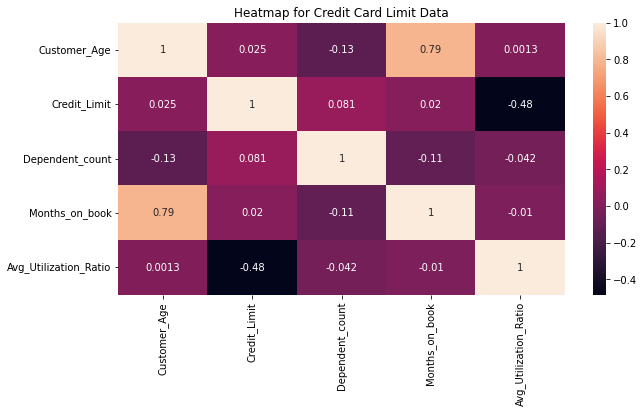

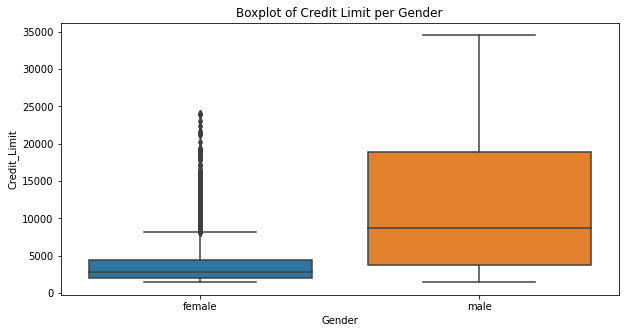

         whishi  whislo      q1     med        q3
Gender                                           
female   8156.0  1438.3  2030.0  2817.0   4489.50
male    34516.0  1438.3  3768.5  8791.0  18916.75


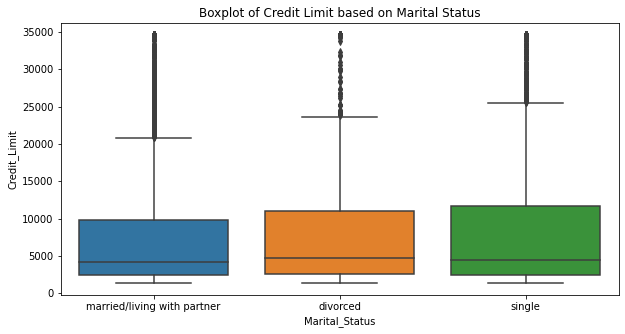

                              whishi  whislo       q1     med        q3
Marital_Status                                                         
divorced                     23603.0  1438.3  2543.00  4701.0  10991.00
married/living with partner  20798.0  1438.3  2494.75  4138.5   9824.25
single                       25410.0  1438.3  2484.00  4508.0  11677.25


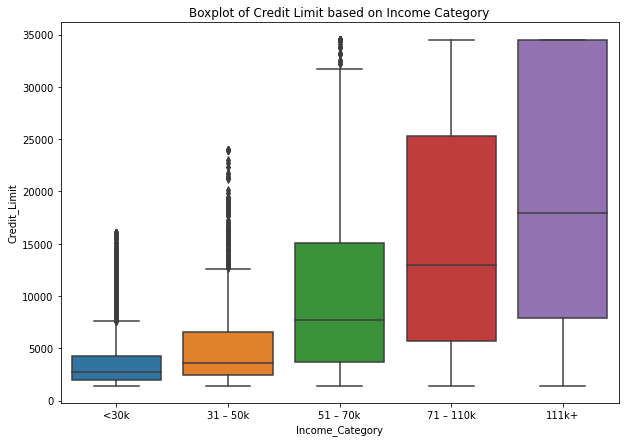

                  whishi  whislo       q1      med        q3
Income_Category                                             
111k+            34516.0  1438.3  7930.00  17966.5  34516.00
31 – 50k         12610.0  1438.3  2433.50   3640.5   6541.50
51 – 70k         31756.0  1438.3  3653.50   7667.0  15035.00
71 – 110k        34516.0  1438.3  5717.75  12939.5  25289.00
<30k              7596.0  1438.3  2015.00   2764.0   4254.25


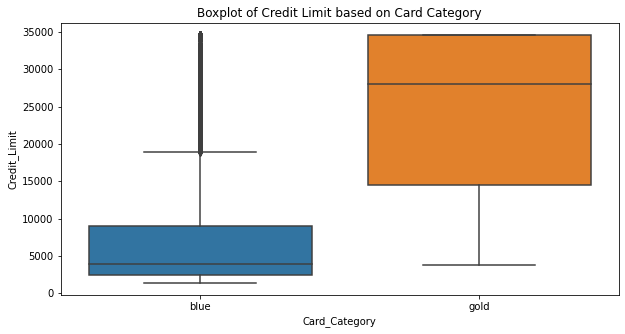

                whishi  whislo        q1      med       q3
Card_Category                                             
blue           18886.0  1438.3   2437.00   3977.0   9027.5
gold           34516.0  3735.0  14452.75  27977.5  34516.0


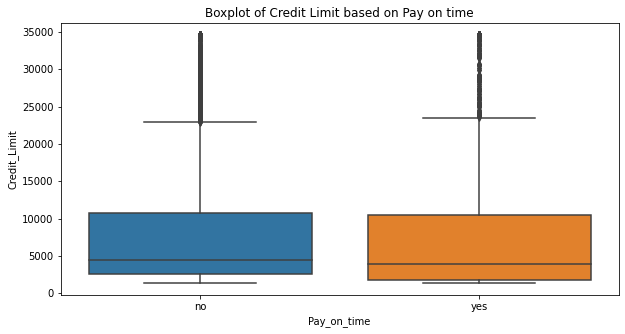

              whishi  whislo      q1     med        q3
Pay_on_time                                           
no           22919.0  1438.3  2628.0  4440.0  10757.00
yes          23453.0  1438.3  1787.0  3931.5  10511.25
1.7035723761391386


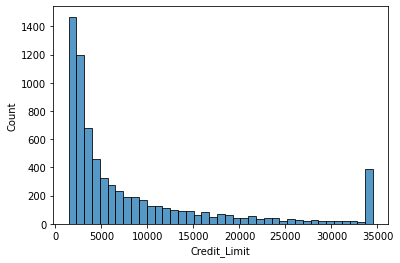

1717.0 34516.0


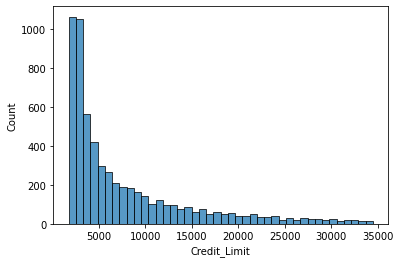

In [ ]:
#Exploratory Data Analysis(EDA)(Part 2)
#------------------- Multivariate analysis---------------------------

#1)Correlation matrix for numerical variables

corr_df=Credit_Data2[["Customer_Age","Credit_Limit","Dependent_count","Months_on_book","Avg_Utilization_Ratio"]]
corr_df

plt.figure(figsize=(10,5))
sns.heatmap(corr_df.corr(),annot=True).set(title="Heatmap for Credit Card Limit Data")
plt.show()
# It can be seen that a postive high correlation exists between Customer Age and Months_on_book(Number of months 
#as credit card customer)with a value of "0.79" ,i.e with the increase in age of customer their number of months as credit card 
#customer increases and vice versa. (Multicollinearity is present between 2 independent variable)

# It can also be seen that a negative moderate correlation exists between Avg_utilization ratio and Credit Limit of "-0.48" 
#which shows that with the increase in avg_utilization ratio(measure of how often the credit card is used) the Credit Limit for that customer
#decreases moderatly and vice versa.(This can further be checked with the help of VIF Value to include Avg_utilisation ratio in th model or not)




#2)Categorical variables versus Numerical variable

#a)Gender and Credit Limit
plt.figure(figsize=(10,5))
sns.boxplot(data=Credit_Data2,x="Gender",y="Credit_Limit").set(title="Boxplot of Credit Limit per Gender")
plt.show()
# from the boxplot above it can be seen that males customers have much higher median credit Limit(8791.0) when compared to
# female customer's median credit limit(2817.0)

gender_credit_limit = Credit_Data2.pivot(columns='Gender', values='Credit_Limit')
# extract the boxplot stats for each gender
gender_credit_limit_stats = [boxplot_stats(gender_credit_limit[col].dropna().values)[0] for col in gender_credit_limit.columns]
#  create a dataframe for the stats for each gender
stats_gender = pd.DataFrame(gender_credit_limit_stats, index=gender_credit_limit.columns).iloc[:, [4, 5, 7, 8, 9]].round(2)
print(stats_gender)


#b)Marital Status and Credit Limit
plt.figure(figsize=(10,5))
sns.boxplot(data=Credit_Data2,x="Marital_Status",y="Credit_Limit").set(title="Boxplot of Credit Limit based on Marital Status")
plt.show()
Marital_credit_limit = Credit_Data2.pivot(columns='Marital_Status', values='Credit_Limit')
# extract the boxplot stats based on Marital status
Marital_credit_limit_stats = [boxplot_stats(Marital_credit_limit[col].dropna().values)[0] for col in Marital_credit_limit.columns]
#  create a dataframe for the stats  based on Marital status
stats_Marital = pd.DataFrame(Marital_credit_limit_stats, index=Marital_credit_limit.columns).iloc[:, [4, 5, 7, 8, 9]].round(2)
print(stats_Marital)
#The median credit limit difference between customers of different marital status is not huge with the median 
#value of single(4508.0),married(4508.0) and divorced(4701.0)


#c)Income Category and Credit Limit
plt.figure(figsize=(10,7))
sns.boxplot(data=Credit_Data2,x="Income_Category",y="Credit_Limit",order=["<30k","31 – 50k","51 – 70k","71 – 110k","111k+"]).set(title="Boxplot of Credit Limit based on Income Category")
plt.show()
Income_Category_credit_limit = Credit_Data2.pivot(columns='Income_Category', values='Credit_Limit')
# extract the boxplot stats based on Income Category
Income_Category_credit_limit_stats = [boxplot_stats(Income_Category_credit_limit[col].dropna().values)[0] for col in Income_Category_credit_limit.columns]
#  create a dataframe for the stats  based on Income Category
stats_Income_Category = pd.DataFrame(Income_Category_credit_limit_stats, index=Income_Category_credit_limit.columns).iloc[:, [4, 5, 7, 8, 9]].round(2)
print(stats_Income_Category)
#It can be seen from the boxplot that with the increase in Income_Category , Credit Limit increases as well.


#d)Card Category and Credit Limit
plt.figure(figsize=(10,5))
sns.boxplot(data=Credit_Data2,x="Card_Category",y="Credit_Limit").set(title="Boxplot of Credit Limit based on Card Category")
plt.show()
Card_Category_credit_limit = Credit_Data2.pivot(columns='Card_Category', values='Credit_Limit')
# extract the boxplot stats based on Card Category
Card_Category_credit_limit_stats = [boxplot_stats(Card_Category_credit_limit[col].dropna().values)[0] for col in Card_Category_credit_limit.columns]
#  create a dataframe for the stats  based on Card Category
stats_Card_Category = pd.DataFrame(Card_Category_credit_limit_stats, index=Card_Category_credit_limit.columns).iloc[:, [4, 5, 7, 8, 9]].round(2)
print(stats_Card_Category)
#It can be clearly seen that people with gold card has much higher credit limit(27977.5) than those with blue card(3977).


#e)Pay_on_time and Credit Limit
plt.figure(figsize=(10,5))
sns.boxplot(data=Credit_Data2,x="Pay_on_time",y="Credit_Limit").set(title="Boxplot of Credit Limit based on Pay on time")
plt.show()
Pay_on_time_credit_limit = Credit_Data2.pivot(columns='Pay_on_time', values='Credit_Limit')
# extract the boxplot stats based on Card Category
Pay_on_time_credit_limit_stats = [boxplot_stats(Pay_on_time_credit_limit[col].dropna().values)[0] for col in Pay_on_time_credit_limit.columns]
#  create a dataframe for the stats  based on Card Category
stats_Pay_on_time = pd.DataFrame(Pay_on_time_credit_limit_stats, index=Pay_on_time_credit_limit.columns).iloc[:, [4, 5, 7, 8, 9]].round(2)
print(stats_Pay_on_time)
# no significant difference between median credit limit for customers who pay and who do not pay on time




# ------------------------------- Finding Outliers --------------------------------------

# from the histogram of credit Limit above in the univarite analysis we saw that the data is positively skewed, moreover
#outliers can also be seen on either sides of the distribution.
#so we we will calculate/find the outlier data points using the statistical approach called interquartile range (IQR) 
#rather than using z-score.



#outlier removal using trimming 

print(Credit_Data2['Credit_Limit'].skew())

sns.histplot(data=Credit_Data2,x="Credit_Limit")
plt.show()

upper=Credit_Data2['Credit_Limit'].quantile(0.1)
lower=Credit_Data2['Credit_Limit'].quantile(0.99)

print(upper,lower)

index=Credit_Data2[(Credit_Data2['Credit_Limit']>=lower)|(Credit_Data2['Credit_Limit']<=upper)].index

Credit_Data2.drop(index,inplace=True)

Credit_Data2['Credit_Limit'].describe()

sns.histplot(data=Credit_Data2,x="Credit_Limit")
plt.show()

Credit_Data_Final1=Credit_Data2


In [ ]:
#Feature Engineering:
# converting the categorical variables to dummy encoded values
Credit_Data_Final1.dtypes

Credit_Data_Final_Categorical=Credit_Data_Final1[["Gender","Education_Level","Marital_Status","Income_Category","Card_Category","Pay_on_time"]]
Credit_Data_Final_Numerical=Credit_Data_Final1[["Customer_Age","Dependent_count","Months_on_book","Credit_Limit","Avg_Utilization_Ratio"]]

## Since there is not a huge difference between the scale of numerical variables , normalization can be avoided.

#Encoding Categorical variables

Credit_Data_Final_Categorical_encoded= pd.get_dummies(Credit_Data_Final_Categorical,drop_first=True)
Credit_Data_Final_Categorical_encoded.head()

#Final Dataframe with encoded values
Credit_Data_Final=pd.concat([Credit_Data_Final_Numerical,Credit_Data_Final_Categorical_encoded],axis=1)




(4799, 15)
(1200, 15)
(4799,)
(1200,)
                            OLS Regression Results                            
Dep. Variable:           Credit_Limit   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     779.4
Date:                Sat, 24 Dec 2022   Prob (F-statistic):               0.00
Time:                        09:24:16   Log-Likelihood:                 1119.9
No. Observations:                5999   AIC:                            -2208.
Df Residuals:                    5983   BIC:                            -2101.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


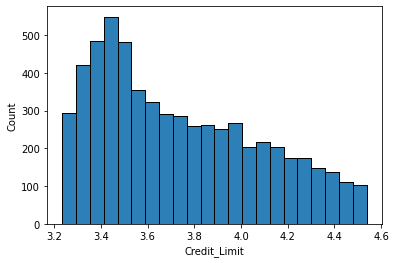

(4799, 8)
(1200, 8)
(4799,)
(1200,)
                            OLS Regression Results                            
Dep. Variable:           Credit_Limit   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     1456.
Date:                Sat, 24 Dec 2022   Prob (F-statistic):               0.00
Time:                        09:24:17   Log-Likelihood:                 1110.4
No. Observations:                5999   AIC:                            -2203.
Df Residuals:                    5990   BIC:                            -2142.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#Linear Regression model

X= Credit_Data_Final.loc[:, Credit_Data_Final.columns!='Credit_Limit']
# since the Credit_Limit is postiviely skewed need to perform transformation
y=np.log10(Credit_Data_Final["Credit_Limit"])

sns.histplot(y)

#hold out cross validation split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


linear_regressor=LinearRegression()
linear_regressor.fit(X_train,y_train)

y_pred=linear_regressor.predict(X_test)

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())



#Since months on book highly correlated with age so removing it from model
#removing all the variables with p value more than 0.05(statistivally insignificant variables)


X=X.loc[:, ~X.columns.isin(['Months_on_book','Education_Level_secondary','Education_Level_third level',
'Customer_Age','Dependent_count','Marital_Status_married/living with partner','Marital_Status_single'])]
y=np.log10(Credit_Data_Final["Credit_Limit"])

sns.histplot(y)
plt.show()

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

linear_regressor=LinearRegression()
linear_regressor.fit(X_train,y_train)

y_pred=linear_regressor.predict(X_test)

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())





Linear Regression
R^2 =  0.6657146563111616
Mean squared error =  0.0403162553480891
Root Mean squared error =  0.20078908174522114


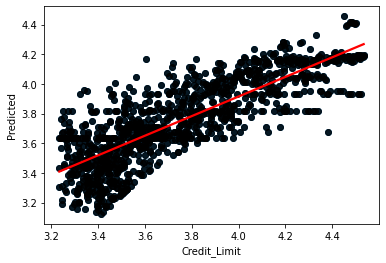

Decision Tree
R^2 =  0.6737155872940408
Mean squared error =  0.03935130853657574
Root Mean squared error =  0.19837164247083236


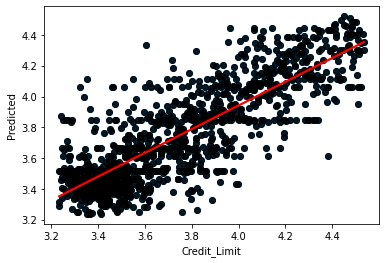

Random Forest
R^2 =  0.724845506795271
Mean squared error =  0.03318481954907882
Root Mean squared error =  0.18216701004594335


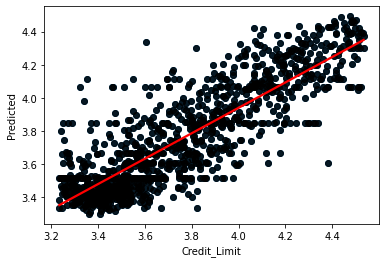

Support Vector Machine
R^2 =  0.7546643188251791
Mean squared error =  0.02958854210924746
Root Mean squared error =  0.17201320329918707


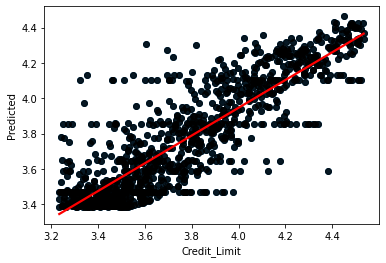

KNN
R^2 =  0.7295453783109
Mean squared error =  0.03261799475790975
Root Mean squared error =  0.1806045258511252


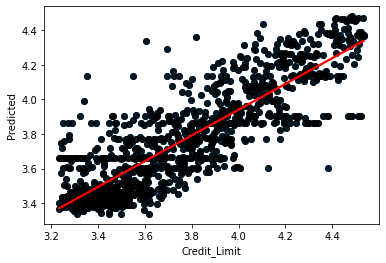

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


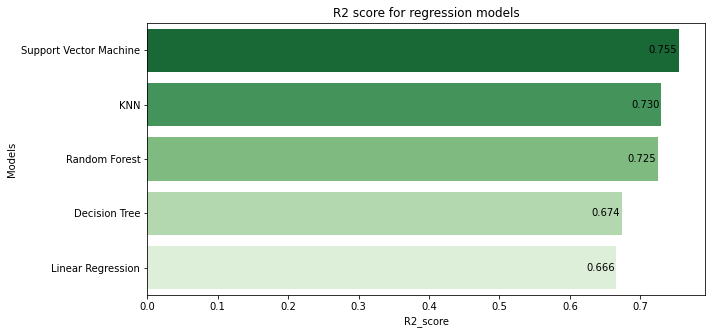

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


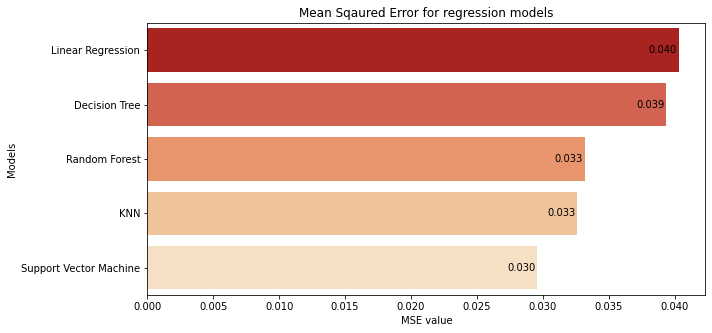

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


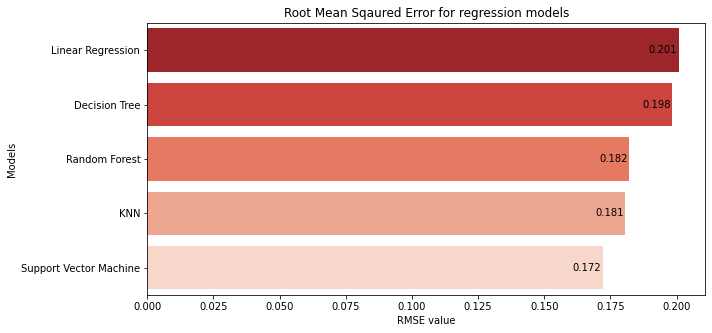

"sorted_score_df= Scores_df.sort_values('r2',ascending=False)\n\n# Figure Size\nfig, ax = plt.subplots(figsize =(8, 4))\n\n# Horizontal Bar Plot\nax.barh(y=sorted_score_df.models, width=sorted_score_df.r2,color=['#358600', '#63c132','#9ee37d','#75d193','#a8ddb1'])\n\n# Remove axes splines\nfor s in ['top', 'bottom', 'left', 'right']:\n    ax.spines[s].set_visible(False)\n\n# Remove x, y Ticks\nax.xaxis.set_ticks_position('none')\nax.yaxis.set_ticks_position('none')\n\n# Add padding between axes and labels\nax.xaxis.set_tick_params(pad = 5)\nax.yaxis.set_tick_params(pad = 10)\n\nax.grid(b = True, color ='black',\n        linestyle ='-.', linewidth = 0.2,\n        alpha = 0.2)\n\n# Show top values\nax.invert_yaxis()\n\n# Add annotation to bars\nfor i in ax.patches:\n    plt.text(i.get_width()+0.05, i.get_y()+0.4,\n            str(round((i.get_width()), 3)),\n            fontsize = 10, fontweight ='bold',\n            color ='#404040')\n\n# Add Plot Title\nax.set_title('',\n            lo

In [ ]:
r2=[]
MSE=[]
RMSE=[]
model_names=[]

def Regression_model(regressor):
  
  regressor.fit(X_train,y_train)

  y_pred=regressor.predict(X_test)

  score=r2_score(y_test,y_pred)
  print("R^2 = ",score)
  r2.append(score)
  print("Mean squared error = ",mean_squared_error(y_test,y_pred))
  MSE.append(mean_squared_error(y_test,y_pred))
  print("Root Mean squared error = ",np.sqrt(mean_squared_error(y_test,y_pred)))
  RMSE.append(np.sqrt(mean_squared_error(y_test,y_pred)))
  plt.scatter(y_test,y_pred);
  plt.xlabel('Actual');
  plt.ylabel('Predicted');
  sns.regplot(x=y_test,y=y_pred,ci=None,scatter_kws={"color": "black"}, line_kws={"color": "red"});
  plt.show()

#choosing 100 estimators for random forest as it gives the best r2 value 
regression_models = {'Linear Regression': LinearRegression(), 'Decision Tree': DecisionTreeRegressor(), 'Random Forest': RandomForestRegressor(n_estimators = 100, random_state = 0),
                     'Support Vector Machine':SVR(kernel = 'rbf'),'KNN':KNeighborsRegressor(n_neighbors=9)}


for name,model in regression_models.items():
 print(name)
 model_names.append(name)
 Regression_model(model)


Scores_dict = {'models':model_names,'r2': r2, 'Mean Sqaured Error': MSE, 'Root Mean Sqaured Error': RMSE} 
Scores_df = pd.DataFrame(Scores_dict)

plt.figure(figsize=(10,5))
plots=sns.barplot(r2,model_names,order=Scores_df.sort_values('r2',ascending = False).models,palette=("Greens_r"))

plt.title("R2 score for regression models")
plt.xlabel('R2_score')
plt.ylabel('Models')

 
# Iterating over the bars one-by-one
for bar in plots.patches:
    

    x_value = bar.get_width()
    y_value = bar.get_y() + bar.get_height() / 2

    # Number of points between bar and label
    space = -30
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative position label to left 
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label to the right
        ha = 'right'

    # Use x value(r2) as label (format number)
    label = '{:,.3f}'.format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at bar end
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords='offset points', # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha,                      # Horizontally align label differently for pos and neg scores
        color = 'black')            # Change label color to black
    
plt.show()


plt.figure(figsize=(10,5))
plots=sns.barplot(MSE,model_names,order=Scores_df.sort_values('Mean Sqaured Error',ascending = False).models,palette=("OrRd_r"))
plt.title("Mean Sqaured Error for regression models")
# Iterating over the bars one-by-one
for bar in plots.patches:
    

    x_value = bar.get_width()
    y_value = bar.get_y() + bar.get_height() / 2

    # Number of points between bar and label
    space = -30
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative position label to left 
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label to the right
        ha = 'right'

    # Use x value(r2) as label (format number)
    label = '{:,.3f}'.format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at bar end
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords='offset points', # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha,                      # Horizontally align label differently for pos and neg scores
        color = 'black')            # Change label color to black
    


plt.xlabel('MSE value');
plt.ylabel('Models');
plt.show()


plt.figure(figsize=(10,5))
plots=sns.barplot(RMSE,model_names,order=Scores_df.sort_values('Root Mean Sqaured Error',ascending = False).models,palette=("Reds_r"))
plt.title("Root Mean Sqaured Error for regression models")
# Iterating over the bars one-by-one
for bar in plots.patches:
    

    x_value = bar.get_width()
    y_value = bar.get_y() + bar.get_height() / 2

    # Number of points between bar and label
    space = -30
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative position label to left 
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label to the right
        ha = 'right'

    # Use x value(r2) as label (format number)
    label = '{:,.3f}'.format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use 'label' as label
        (x_value, y_value),         # Place label at bar end
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords='offset points', # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha,                      # Horizontally align label differently for pos and neg scores
        color = 'black')            # Change label color to black
    


plt.xlabel('RMSE value');
plt.ylabel('Models');
plt.show()





#Alternate method to plot horizontal plot with annotation
'''sorted_score_df= Scores_df.sort_values('r2',ascending=False)

# Figure Size
fig, ax = plt.subplots(figsize =(8, 4))

# Horizontal Bar Plot
ax.barh(y=sorted_score_df.models, width=sorted_score_df.r2,color=['#358600', '#63c132','#9ee37d','#75d193','#a8ddb1'])

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='black',
        linestyle ='-.', linewidth = 0.2,
        alpha = 0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.05, i.get_y()+0.4,
            str(round((i.get_width()), 3)),
            fontsize = 10, fontweight ='bold',
            color ='#404040')

# Add Plot Title
ax.set_title('',
            loc ='left', )
plt.xlabel('r2 value')
plt.ylabel('Models')

# Show Plot
plt.show()
'''


